In [92]:
import spacy
from matplotlib import pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import ffmpeg
from pathlib import Path
import json
from tqdm import tqdm
import seaborn as sns

In [47]:
nlp = spacy.load("ru_core_news_sm")
id2name = json.load(Path('id2name.json').open('r', encoding='utf-8'))

# 0. –û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [62]:
not_allowed = ['<', '>', ':', '"', '/', '\\', '|', '?', '*']

def caption2vidfile(caption):
    name = id2name.get(caption.stem)
    for symbol in not_allowed:
        name = name.replace(symbol, '')
    return Path('D:/YandexDisk/SLR Project') / (name + '.mp4')

In [38]:
def get_ministats(sentence):
    doc = nlp(sentence)
    lemmas = []
    bigrams = []
    trigrams = []
    word_count = 0
    for i in range(len(doc)):
        if not(doc[i].is_punct or doc[i].is_space):
            word_count += 1

            if not doc[i].is_stop:
                lemmas.append(doc[i].lemma_)

            if i > 0 and not(doc[i-1].is_punct or doc[i-1].is_space):
                bigrams.append((doc[i-1].lemma_, doc[i].lemma_))

                if i > 1 and not(doc[i-2].is_punct or doc[i-2].is_space):
                    trigrams.append((doc[i-2].lemma_, doc[i-1].lemma_, doc[i].lemma_))
    
    return {
        'word_count': word_count,
        'lemmas': lemmas,
        'bigrams': bigrams,
        'trigrams': trigrams
    }

In [71]:
captions = []
path_files = [fpath for fpath in Path('D:/YandexDisk/SLR Project_subs').iterdir()]


for caption_file in tqdm(path_files):
    vidfile = caption2vidfile(caption_file)
    
    vid_id = caption_file.stem
    vid_name = vidfile.stem
    vid_dur = float(ffmpeg.probe(vidfile)['format']['duration']) if vidfile.exists() else None
    
    for caption in json.load(caption_file.open('r', encoding='utf-8')):
        info_dct = caption.copy()
        info_dct.update({
            'vid_id': vid_id,
            'vid_name': vid_name,
            'vid_dur': vid_dur
        })
        info_dct.update(get_ministats(caption['text']))
        captions.append(info_dct)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 321/321 [08:16<00:00,  1.55s/it]


In [75]:
df = pd.DataFrame(captions)

In [76]:
df.head()

text  start  duration  \
0                                    - –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ!   6.26      1.46   
1            –°–µ–π—á–∞—Å –º—ã –ø—Ä–µ–¥—Å—Ç–∞–≤–∏–º –Ω–∞—à–∏—Ö –¥–≤—É—Ö –≥–µ—Ä–æ–µ–≤.   7.88      2.88   
2  –í–∞—Å–∏–ª–∏–π –ò–≤–∞–Ω–æ–≤. –û–Ω –ø–µ–¥–∞–≥–æ–≥ —à–∫–æ–ª—ã ‚Ññ10 (–ø–æ —Å—Ç–∞—Ä–æ...  12.08      9.42   
3  –í—Ç–æ—Ä–æ–π ‚Äì –ê–ª–µ–∫—Å–µ–π –ó–Ω–∞–º–µ–Ω—Å–∫–∏–π. –û–Ω –∞–∫—Ç—ë—Ä, —Ä–µ–∂–∏—Å—Å—ë...  22.26      8.92   
4  –ú—ã –ø—Ä–∏–≥–ª–∞—Å–∏–ª–∏ –∏—Ö, —Ö–æ—Ç–∏–º –∑–∞–¥–∞—Ç—å –≤–æ–ø—Ä–æ—Å—ã. –í —Å–≤—è–∑...  32.92      1.88   

        vid_id                                           vid_name  vid_dur  \
0  -fAgydbc3EI  –¶–µ–ª—å –°–∞—Ö–∞–ª–∏–Ω. –ü–æ —Å–ª–µ–¥–∞–º –ê–Ω—Ç–æ–Ω–∞ –ü–∞–≤–ª–æ–≤–∏—á–∞ –ß–µ—Ö–æ–≤...   597.76   
1  -fAgydbc3EI  –¶–µ–ª—å –°–∞—Ö–∞–ª–∏–Ω. –ü–æ —Å–ª–µ–¥–∞–º –ê–Ω—Ç–æ–Ω–∞ –ü–∞–≤–ª–æ–≤–∏—á–∞ –ß–µ—Ö–æ–≤...   597.76   
2  -fAgydbc3EI  –¶–µ–ª—å –°–∞—Ö–∞–ª–∏–Ω. –ü–æ —Å–ª–µ–¥–∞–º –ê–Ω—Ç–æ–Ω–∞ –ü–∞–≤–ª–æ–≤–∏—á–∞ –ß–µ—Ö–æ–≤...   597.76   
3  -fAgydbc3EI  –¶–µ–ª—å –°–∞—Ö–∞–ª–∏–Ω. –ü–æ —Å–ª–µ–¥–∞–º –ê–Ω—Ç–æ–Ω–∞ –ü–∞–≤–ª–æ–≤–∏—á–∞ –ß–µ—Ö–æ–≤...   597.76   
4  -fAgydbc3EI  –¶–µ–ª—å –°–∞—Ö–∞–ª–∏–Ω. –ü–æ —Å–ª–µ–¥–∞–º –ê–Ω—Ç–æ–Ω–∞ –ü–∞–≤–ª–æ–≤–∏—á–∞ –ß–µ—Ö–æ–≤...   597.76   

   word_count                                             lemmas  \
0           1                                    [–∑–¥—Ä–∞–≤—Å—Ç–≤–æ–≤–∞—Ç—å]   
1           6                          [–ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å, –¥–≤–∞, –≥–µ—Ä–æ–π]   
2          15  [–≤–∞—Å–∏–ª–∏–π, –∏–≤–∞–Ω–æ–≤, –ø–µ–¥–∞–≥–æ–≥, —à–∫–æ–ª–∞, ‚Ññ, 10, —Å—Ç–∞—Ä—ã...   
3           8  [–≤—Ç–æ—Ä–æ–π, –∞–ª–µ–∫—Å–µ–π, –∑–Ω–∞–º–µ–Ω—Å–∫–∏–π, –∞–∫—Ç—ë—Ä, —Ä–µ–∂–∏—Å—Å—ë—Ä,...   
4          10        [–ø—Ä–∏–≥–ª–∞—Å–∏—Ç—å, —Ö–æ—Ç–µ—Ç—å, –∑–∞–¥–∞—Ç—å, –≤–æ–ø—Ä–æ—Å, —Å–≤—è–∑—å]   

                                             bigrams  \
0                                                 []   
1  [(—Å–µ–π—á–∞—Å, –º—ã), (–º—ã, –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å), (–ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å...   
2  [(–≤–∞—Å–∏–ª–∏–π, –∏–≤–∞–Ω–æ–≤), (–æ–Ω, –ø–µ–¥–∞–≥–æ–≥), (–ø–µ–¥–∞–≥–æ–≥, —à...   
3  [(–∞–ª–µ–∫—Å–µ–π, –∑–Ω–∞–º–µ–Ω—Å–∫–∏–π), (–æ–Ω, –∞–∫—Ç—ë—Ä), (—Ä–µ–∂–∏—Å—Å—ë—Ä...   
4  [(–º—ã, –ø—Ä–∏–≥–ª–∞—Å–∏—Ç—å), (–ø—Ä–∏–≥–ª–∞—Å–∏—Ç—å, –∏—Ö), (—Ö–æ—Ç–µ—Ç—å, ...   

                                            trigrams  
0                                                 []  
1  [(—Å–µ–π—á–∞—Å, –º—ã, –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å), (–º—ã, –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å, ...  
2  [(–æ–Ω, –ø–µ–¥–∞–≥–æ–≥, —à–∫–æ–ª–∞), (–ø–µ–¥–∞–≥–æ–≥, —à–∫–æ–ª–∞, ‚Ññ), (—à...  
3                                                 []  
4  [(–º—ã, –ø—Ä–∏–≥–ª–∞—Å–∏—Ç—å, –∏—Ö), (—Ö–æ—Ç–µ—Ç—å, –∑–∞–¥–∞—Ç—å, –≤–æ–ø—Ä–æ—Å...

# 1. –û–±—â–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏

In [116]:
groupby_vid = df.groupby('vid_id').agg({'vid_dur': 'mean'})

total_vids = len(groupby_vid)
total_vid_dur = groupby_vid.vid_dur.sum() / 3600
total_words = df.word_count.sum()
total_replics_num = len(df)
total_replics_dur = df.duration.sum() / 3600
replics_vid_ratio_pc = (total_replics_dur / total_vid_dur) * 100

In [117]:
print(f'''
–í—Å–µ–≥–æ {total_vids} –≤–∏–¥–µ–æ –æ–±—â–µ–π –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é {round(total_vid_dur, 2)} —á–∞—Å–æ–≤.
–í—Å–µ–≥–æ {total_replics_num} —Ä–µ–ø–ª–∏–∫ –æ–±—â–µ–π –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é {round(total_replics_dur, 2)} —á–∞—Å–æ–≤, —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö {total_words} —Å–ª–æ–≤.
–í —Å—Ä–µ–¥–Ω–µ–º —Ä–µ–ø–ª–∏–∫–∏ –∑–∞–Ω–∏–º–∞—é—Ç {round(replics_vid_ratio_pc, 2)}% –æ—Ç –æ–±—â–µ–π –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤–∏–¥–µ–æ
''')


–í—Å–µ–≥–æ 321 –≤–∏–¥–µ–æ –æ–±—â–µ–π –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é 54.98 —á–∞—Å–æ–≤.
–í—Å–µ–≥–æ 30387 —Ä–µ–ø–ª–∏–∫ –æ–±—â–µ–π –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é 41.33 —á–∞—Å–æ–≤, —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö 268313 —Å–ª–æ–≤.
–í —Å—Ä–µ–¥–Ω–µ–º —Ä–µ–ø–ª–∏–∫–∏ –∑–∞–Ω–∏–º–∞—é—Ç 75.18% –æ—Ç –æ–±—â–µ–π –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤–∏–¥–µ–æ



# 2. –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø–æ —Ä–µ–ø–ª–∏–∫–∞–º

Text(0.5, 1.0, '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–µ–ø–ª–∏–∫ –ø–æ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏')

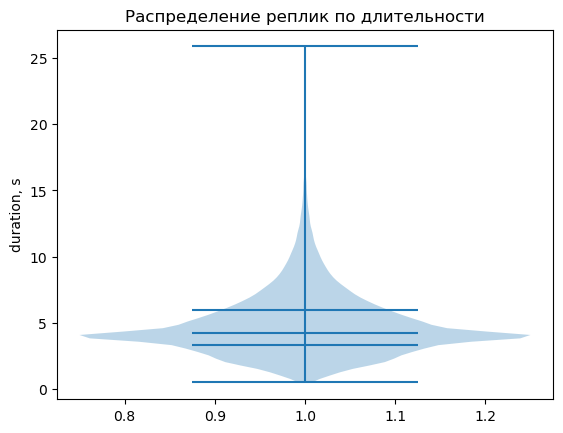

In [95]:
plt.figure()
plt.violinplot(df.duration, showmedians=True, quantiles=[0.25, 0.75])
plt.ylabel('duration, s')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–µ–ø–ª–∏–∫ –ø–æ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏')

Text(0.5, 1.0, '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–µ–ø–ª–∏–∫ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Å–ª–æ–≤')

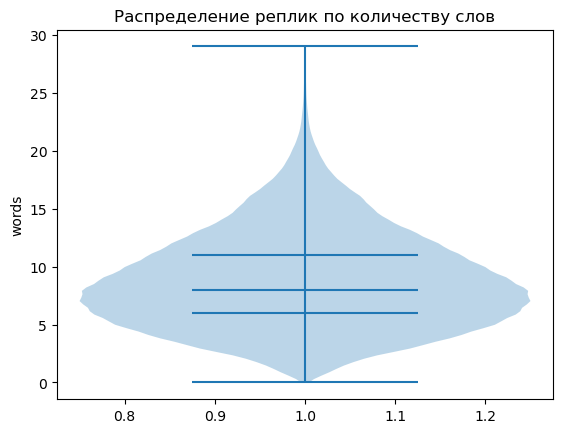

In [97]:
plt.figure()
plt.violinplot(df.word_count, showmedians=True, quantiles=[0.25, 0.75])
plt.ylabel('words')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–µ–ø–ª–∏–∫ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Å–ª–æ–≤')

# 3. –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –≤–∏–¥–µ–æ

In [126]:
groupby_vid = df.groupby('vid_id').agg({'vid_dur': 'mean', 'duration': 'sum', 'word_count': 'sum', 'text': 'count'}).dropna()

Text(0.5, 1.0, '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ä–µ–ø–ª–∏–∫ –Ω–∞ –º–∏–Ω—É—Ç—É –≤–∏–¥–µ–æ')

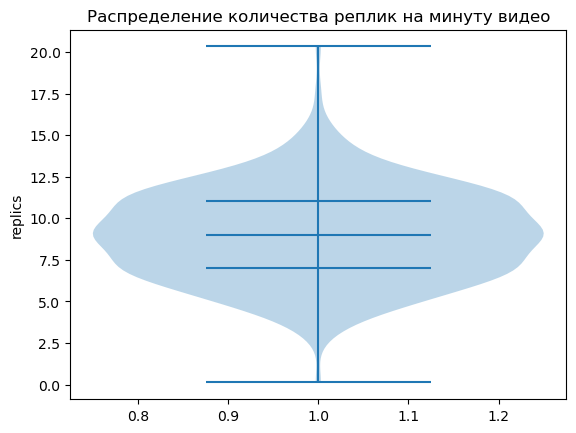

In [129]:
plt.figure()
plt.violinplot(groupby_vid.text / groupby_vid.vid_dur * 60, showmedians=True, quantiles=[0.25, 0.75])
plt.ylabel('replics')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ä–µ–ø–ª–∏–∫ –Ω–∞ –º–∏–Ω—É—Ç—É –≤–∏–¥–µ–æ')

Text(0.5, 1.0, '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–Ω–æ—à–µ–Ω–∏—è –æ–±—â–µ–π –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ä–µ–ø–ª–∏–∫\n–∫ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤–∏–¥–µ–æ')

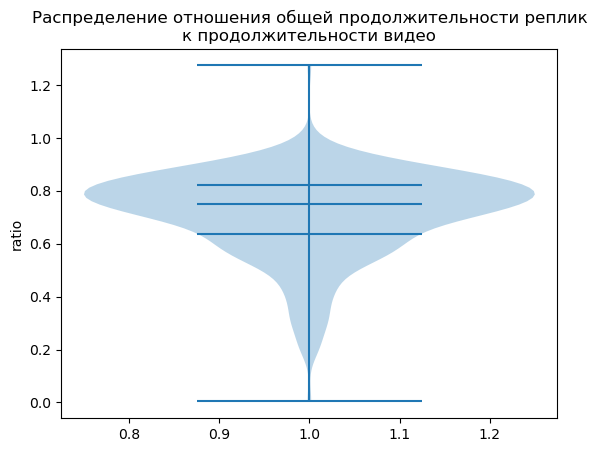

In [135]:
plt.figure()
plt.violinplot(groupby_vid.duration / groupby_vid.vid_dur, showmedians=True, quantiles=[0.25, 0.75], )
plt.ylabel('ratio')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–Ω–æ—à–µ–Ω–∏—è –æ–±—â–µ–π –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ä–µ–ø–ª–∏–∫\n–∫ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤–∏–¥–µ–æ')

(–ó–Ω–∞—á–µ–Ω–∏—è –±–æ–ª—å—à–µ 1 –æ–∑–Ω–∞—á–∞—é—Ç, —á—Ç–æ –±—ã–≤–∞–µ—Ç –Ω–∞–ª–æ–∂–µ–Ω–∏–µ —Ä–µ–ø–ª–∏–∫ –¥—Ä—É–≥ –Ω–∞ –¥—Ä—É–≥–∞)

Text(0.5, 1.0, '–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–≤ –Ω–∞ –º–∏–Ω—É—Ç—É –≤–∏–¥–µ–æ')

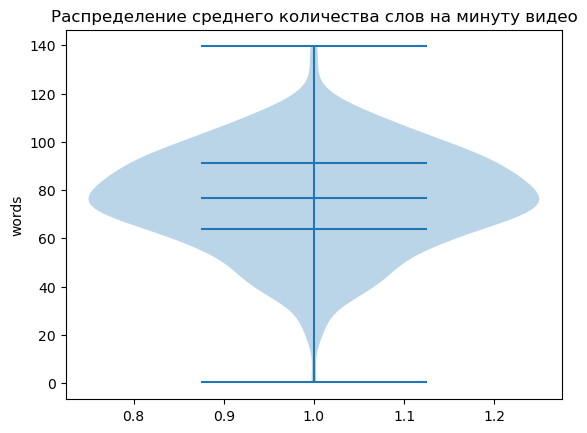

In [136]:
plt.figure()
plt.violinplot(groupby_vid.word_count / groupby_vid.vid_dur * 60, showmedians=True, quantiles=[0.25, 0.75])
plt.ylabel('words')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–ª–æ–≤ –Ω–∞ –º–∏–Ω—É—Ç—É –≤–∏–¥–µ–æ')

# 4. –¢–µ–∫—Å—Ç–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏

## 4.1. –ß–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç—å —Å–ª–æ–≤

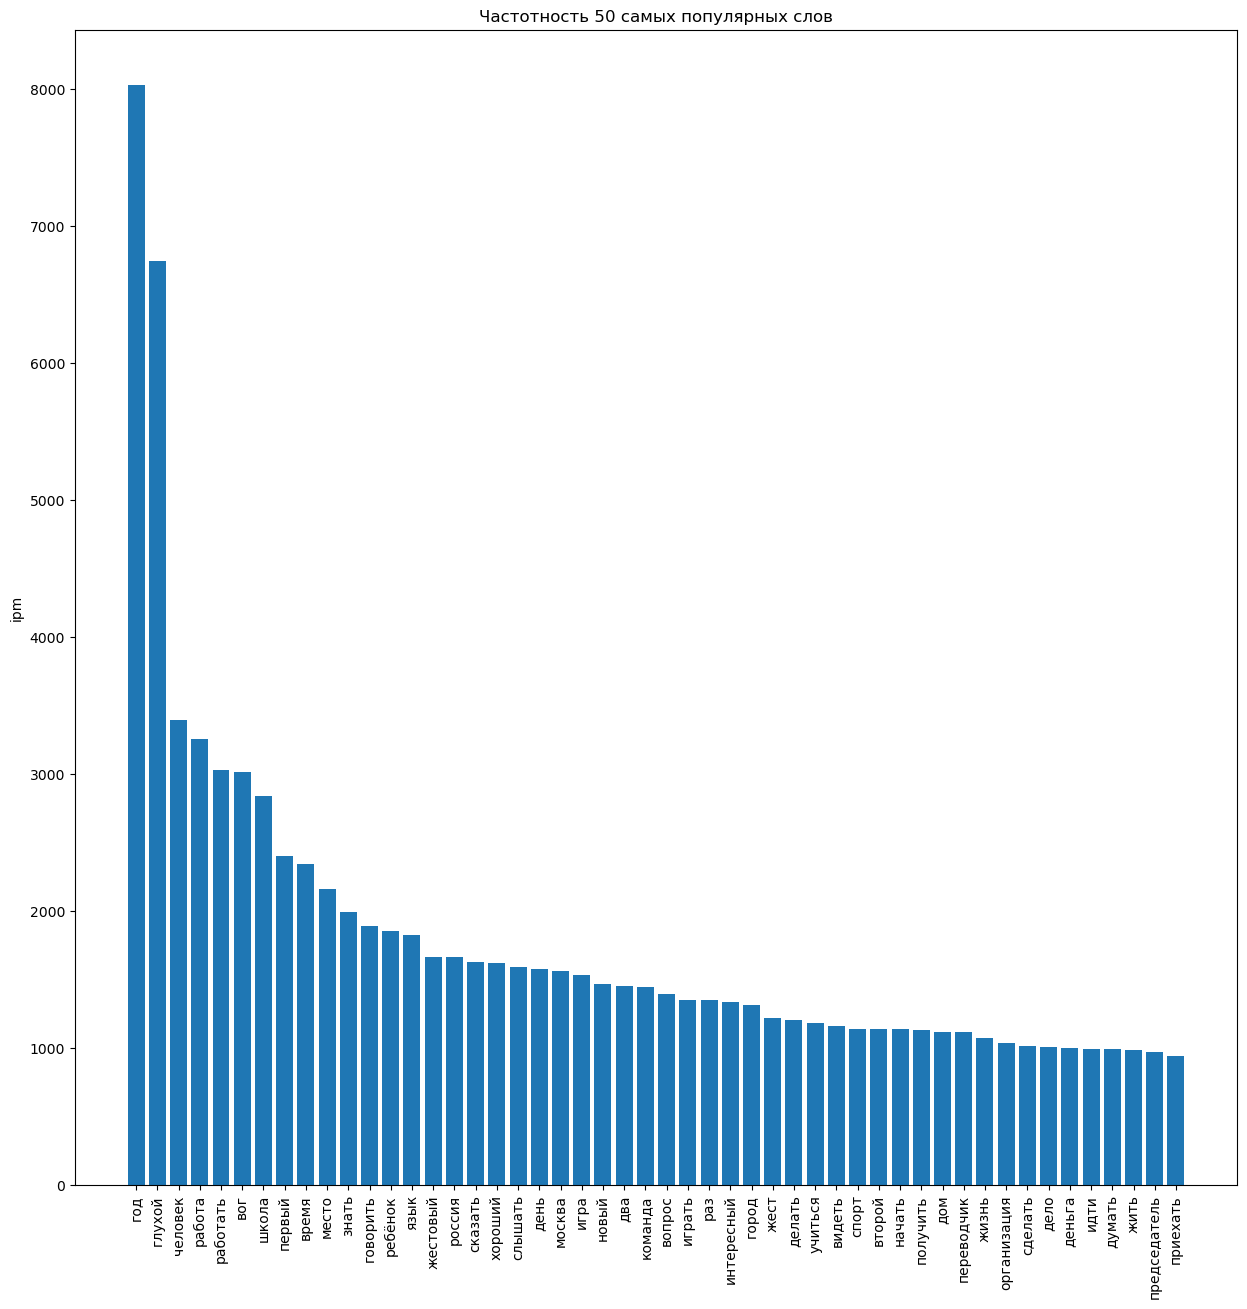

In [153]:
word_cnt = Counter()
df.lemmas.apply(word_cnt.update)
top_50 = word_cnt.most_common(50)


plt.figure(figsize=(15,15))
plt.bar(
    [pair[0] for pair in top_50],
    [pair[1] / total_words * 1e6 for pair in top_50]
)
plt.xticks(rotation=90)
plt.ylabel('ipm')
plt.title('–ß–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç—å 50 —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Å–ª–æ–≤')
plt.show()

## 4.2. –ß–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç—å –±–∏–≥—Ä–∞–º

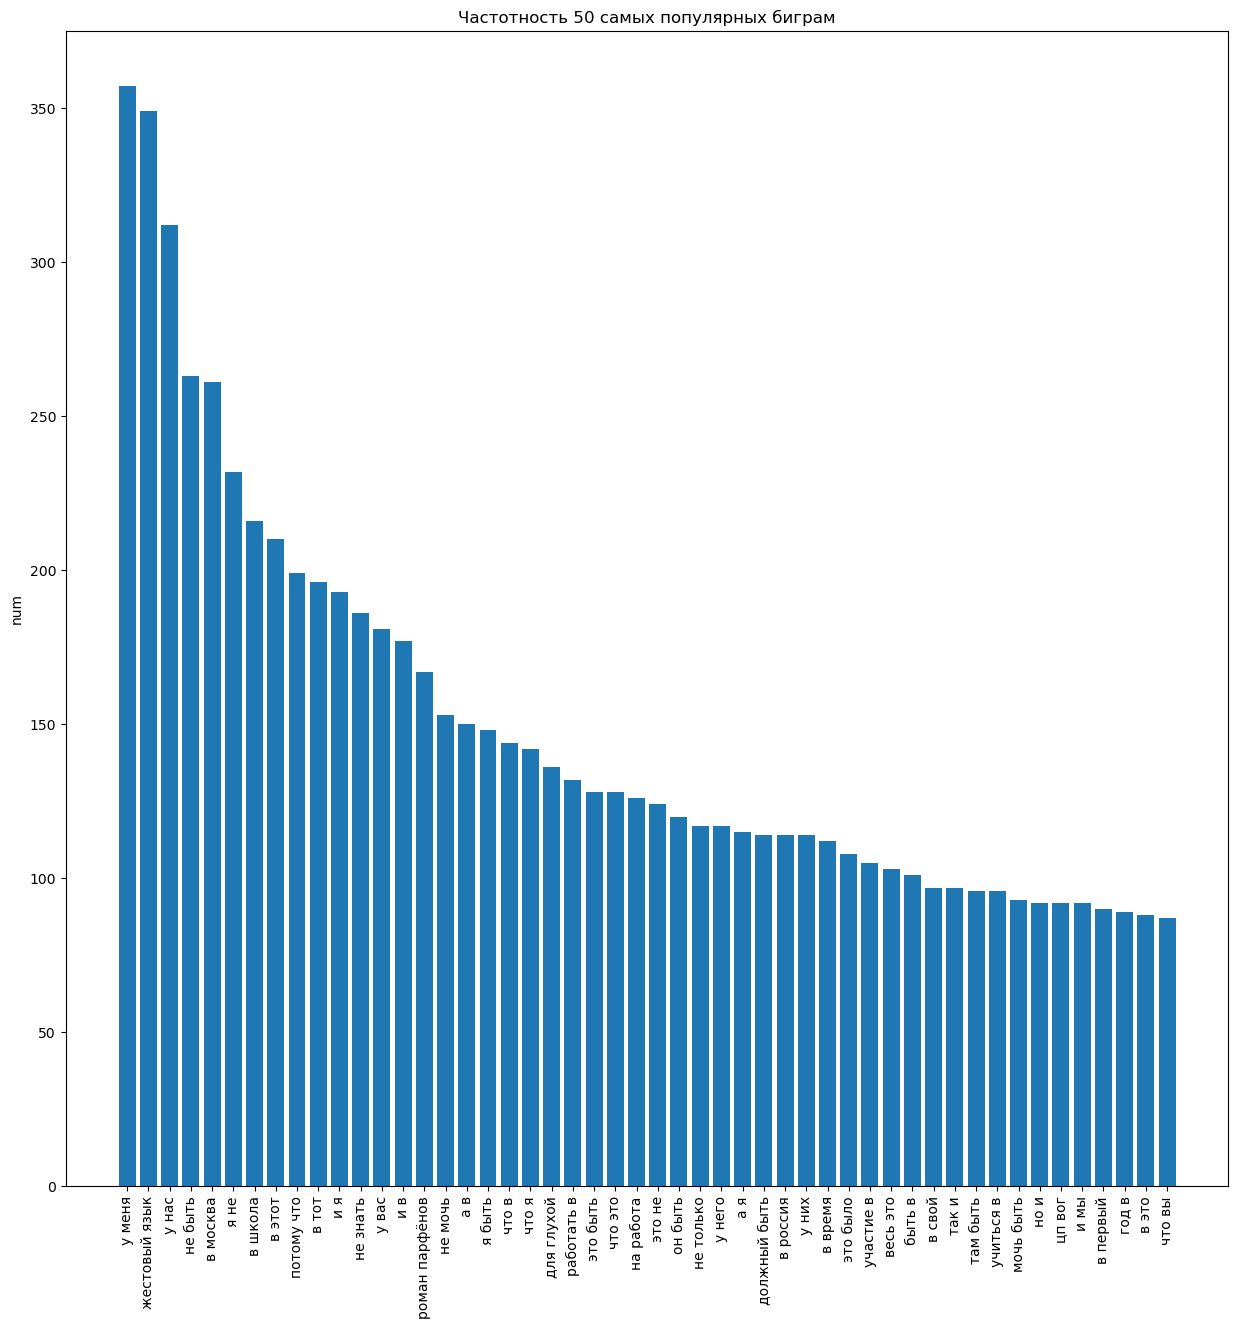

In [156]:
bigram_cnt = Counter()
df.bigrams.apply(bigram_cnt.update)
top_50 = bigram_cnt.most_common(50)


plt.figure(figsize=(15,15))
plt.bar(
    [' '.join(pair[0]) for pair in top_50],
    [pair[1] for pair in top_50]
)
plt.xticks(rotation=90)
plt.ylabel('num')
plt.title('–ß–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç—å 50 —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –±–∏–≥—Ä–∞–º')
plt.show()

## 4.3. –ß–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç—å —Ç—Ä–∏–≥—Ä–∞–º

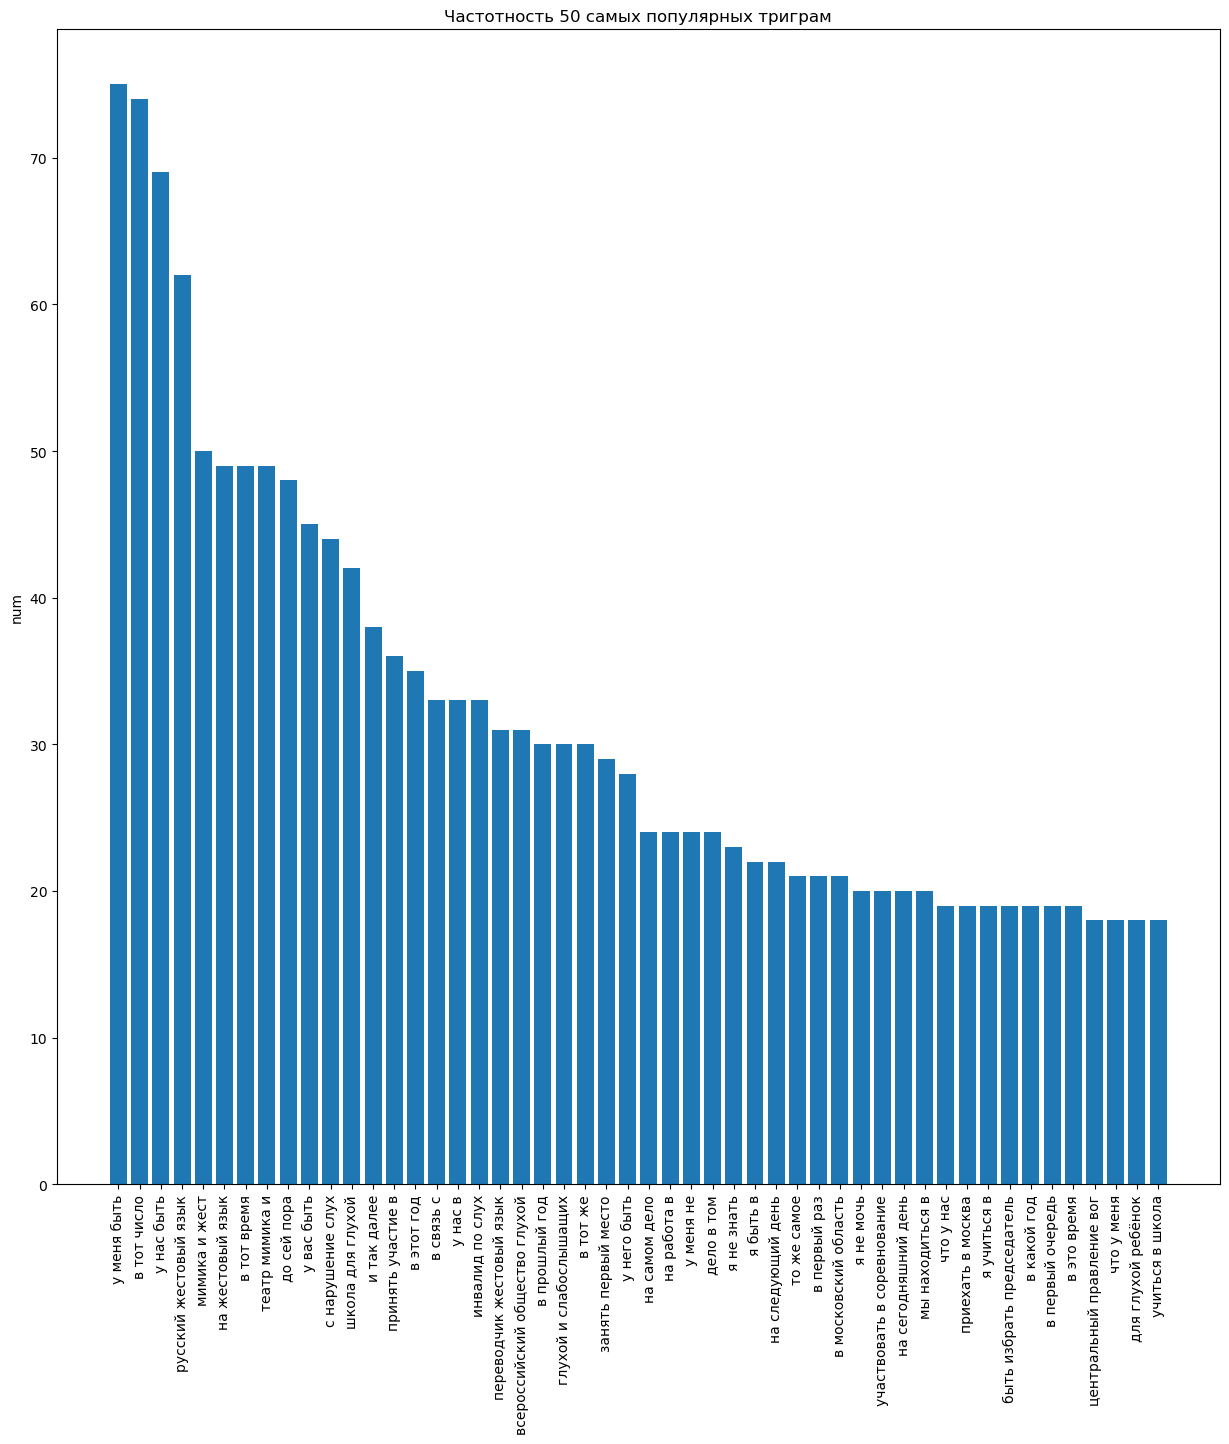

In [157]:
trigram_cnt = Counter()
df.trigrams.apply(trigram_cnt.update)
top_50 = trigram_cnt.most_common(50)


plt.figure(figsize=(15,15))
plt.bar(
    [' '.join(pair[0]) for pair in top_50],
    [pair[1] for pair in top_50]
)
plt.xticks(rotation=90)
plt.ylabel('num')
plt.title('–ß–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç—å 50 —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Ç—Ä–∏–≥—Ä–∞–º')
plt.show()

## 4.4. –û–±–ª–∞–∫–æ —Å–ª–æ–≤üòç

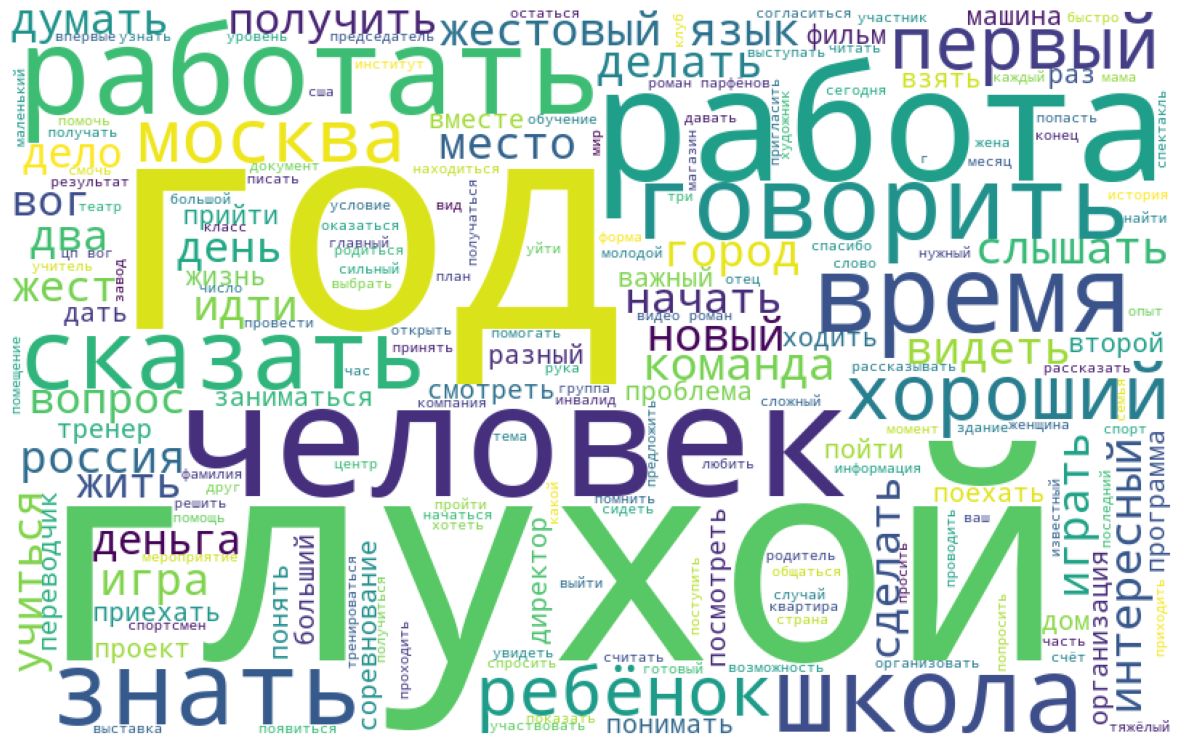

In [165]:
words_list = []
df.lemmas.apply(words_list.extend)

plt.figure(figsize=(15,15))
wc = WordCloud(background_color='white', width = 800, height = 500).generate(' '.join(words_list))
plt.axis('off')
plt.imshow(wc)